# K Nearest Neighbors - Atividade 03

Bem-vindo ao Projeto de KNN! Este será um projeto simples e muito parecido com o notebook, com a diferença de que você receberá outro conjunto de dados. Vá em frente e siga as instruções abaixo.
## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Obtenha os dados
** Leia o arquivo csv 'KNN_Project_Data' em um DataFrame **

In [2]:
from google.colab import files
uploaded = files.upload()

Saving KNN_Project_Data.csv to KNN_Project_Data (1).csv


In [3]:
df = pd.read_csv('KNN_Project_Data.csv')

** Verifique o cabeçalho do DataFrame.**

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [5]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


# Divisão treino-teste

** Use o método train_test_split para dividir seus dados em um conjunto treino e teste.**

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('TARGET CLASS',axis=1)
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

# Padronize as variáveis

Hora de para padronizar as variáveis.

** Import StandardScaler do Scikit-learn. **

In [7]:
from sklearn.preprocessing import StandardScaler 
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy() 

** Crie um objeto StandardScaler() chamado scaler. **

In [8]:
scaler = StandardScaler()

** Use o método fit() do objeto para treinar o modelo. **

In [29]:
scaler.fit(X_train[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']])

StandardScaler()

** Use o método .transform () para transformar os parâmetros em uma versão padronizada. **

In [10]:
df.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

In [30]:
X_train_scaled[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']] = scaler.transform(X_train[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']])  
X_test_scaled[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']] = scaler.transform(X_test[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']])

** Converta os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou. **

In [31]:
X_train_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
541,-1.594010,0.584541,-0.680589,0.885079,-0.331101,0.287269,-1.326559,0.583467,0.352073,1.651636
440,-1.478875,0.111455,-1.487069,0.478673,0.632534,-0.067932,1.287428,0.768341,1.248123,-0.786333
482,0.018348,1.832448,-0.340968,0.687772,1.152013,-0.923793,-0.521554,0.272773,0.089718,-2.203299
422,0.534513,0.331759,0.633546,0.190957,1.626781,0.501702,-0.078628,1.048279,-1.532975,-1.883207
778,-0.737274,-0.244397,0.577852,1.081180,0.667223,1.370688,-0.757630,0.664345,-0.087544,-1.752222


# Usando o KNN

** Importe o KNeighborClassifier do scikit learn. **

In [32]:
from sklearn.neighbors import KNeighborsClassifier


** Crie uma instância do modelo KNN com n_neighbors = 1 **

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)

** Ajuste este modelo KNN aos dados de treinamento. **

In [34]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

# Escolhendo o valor K
Vamos continuar usando o método do cotovelo para escolher um bom valor K!

** Crie um loop for que treine vários modelos KNN com valores k diferentes e, em seguida, mantenha um registro do error_rate para cada um desses modelos com uma lista. Consulte o notebook se você estiver confuso nesta etapa. **

In [35]:
import numpy as np

score = []

for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled, y_train)
  score.append(knn.score(X_test_scaled, y_test))
  


** Agora crie o seguinte gráfico usando as informações do seu loop. **

Text(0, 0.5, 'Score')

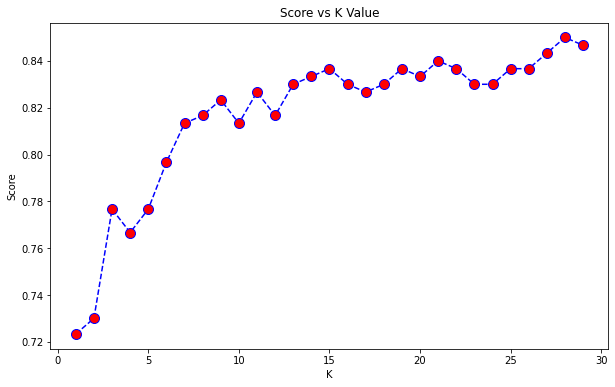

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Score vs K Value')
plt.xlabel('K')
plt.ylabel('Score')

In [37]:
error = []
for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled, y_train)
  error.append(1-knn.score(X_test_scaled, y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Errorvs K Value')
plt.xlabel('K')
plt.ylabel('Error')

## Treine seu modelo novamente com novo valor K

** Treine novamente seu modelo com o melhor valor K (até você para decidir o que deseja) e re-faça o relatório de classificação e a matriz de confusão. **

In [38]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.8233333333333334

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [46]:
y_test_pred = knn.predict(X_test_scaled)
confusion_matrix(y_test, y_test_pred)

array([[124,  22],
       [ 31, 123]])

In [ ]:
from sklearn.metrics import classification_report

In [27]:
df['TARGET CLASS'].unique()

array([0, 1])

In [44]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.85      0.80      0.82       154

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

